In [2]:
import csv
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
aj_path = "/Users/vocat/MCC/Projects/Resources/Project-1/Crime_Report.csv"

In [4]:
def make_df(aj_path): # Reads the csv file in and makes it a DataFrame
    df = pd.read_csv(aj_path, low_memory=False)
    return df

In [5]:
directory = os.path.dirname(aj_path)
dir_string = str(directory) + "/Crime_Report.csv"

In [7]:
all_data_df = make_df(dir_string)
date_crime = pd.concat([all_data_df['Occurred Date'], all_data_df['Highest Offense Description']], axis=1)
crimes = date_crime['Highest Offense Description'].unique()

In [8]:
filtered_identity_theft = date_crime[date_crime['Highest Offense Description'].str.contains('identity theft', case=False)]

In [9]:
identity_theft = pd.concat([filtered_identity_theft], ignore_index=True)
identity_theft['Occurred Date'] = pd.to_datetime(identity_theft['Occurred Date'], format='mixed')

In [10]:
# Extract month from 'Occurred Date'
identity_theft['Month'] = identity_theft['Occurred Date'].dt.month

In [11]:
# Filter data between years 2003 and 2023
filtered_years = identity_theft[(identity_theft['Occurred Date'].dt.year >= 2003) & (identity_theft['Occurred Date'].dt.year <= 2023)]


In [12]:
# Group by 'Month' and count occurrences
month_counts = filtered_years.groupby('Month')['Occurred Date'].size()
month_avg = month_counts.mean()

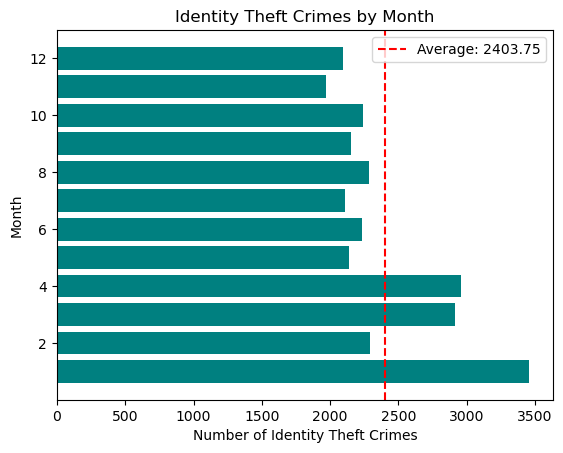

In [13]:
# Plotting
plt.barh(month_counts.index, month_counts, color='teal')
plt.axvline(x=month_avg, color='red', linestyle='--', label=f'Average: {month_avg:.2f}')
plt.legend()
plt.title('Identity Theft Crimes by Month')
plt.xlabel('Number of Identity Theft Crimes')
plt.ylabel('Month')
plt.show()

In [14]:
# Monthly Bar Chart

In [15]:
# Count the number of identity thefts per month
month_counts = filtered_years['Month'].value_counts().sort_index()

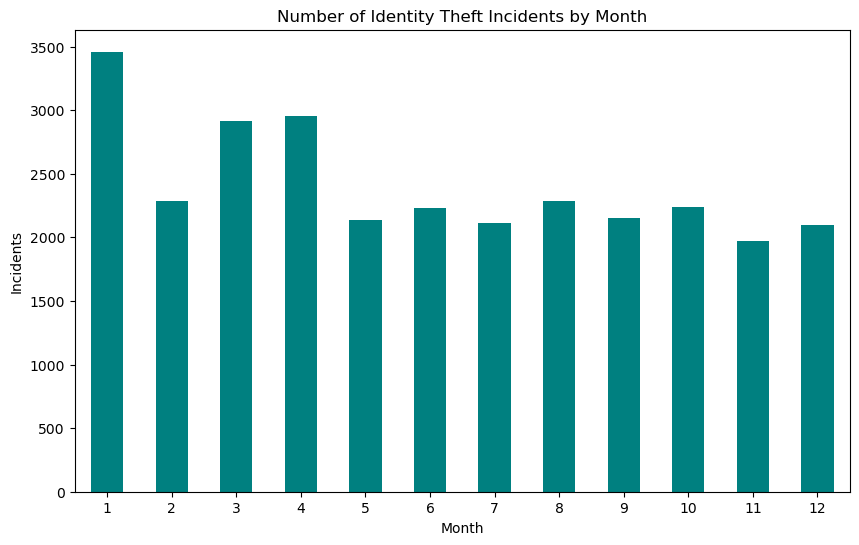

In [16]:
# Create a bar chart
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='teal')
plt.title('Number of Identity Theft Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Incidents')
plt.xticks(rotation=0)
plt.show()

In [17]:
# Yearly Trend line

In [18]:
# Count the number of incidents per year
yearly_counts = filtered_years['Occurred Date'].dt.year.value_counts().sort_index()

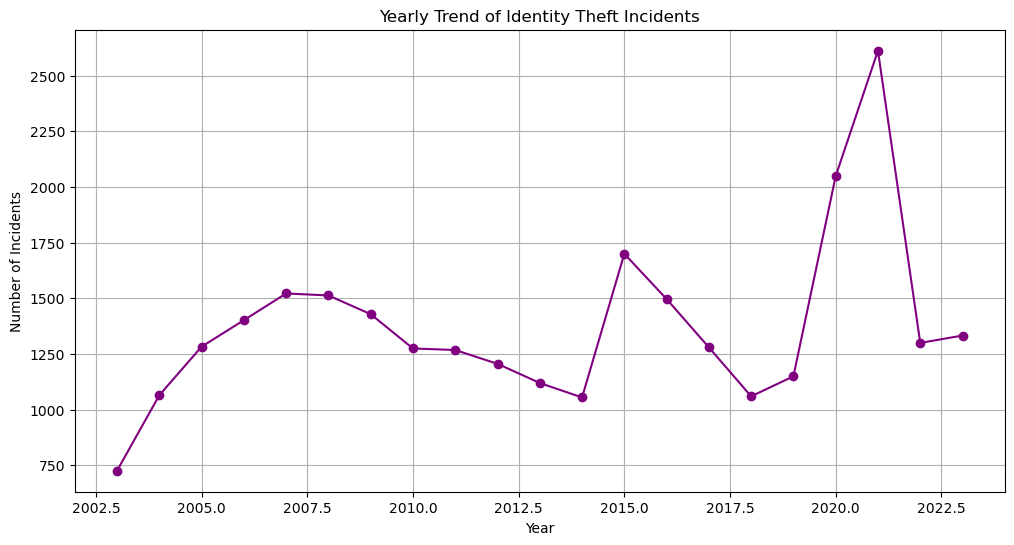

In [19]:
# Create a line plot
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='line', marker='o', linestyle='-', color='purple')
plt.title('Yearly Trend of Identity Theft Incidents')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

In [ ]:
# Monthly Trend Over Years

In [20]:
# Create a pivot table with years as rows and months as columns
monthly_trends = filtered_years.pivot_table(index=filtered_years['Occurred Date'].dt.year, columns='Month', values='Highest Offense Description', aggfunc='count')
# Fill NaN values with 0
monthly_trends.fillna(0, inplace=True)

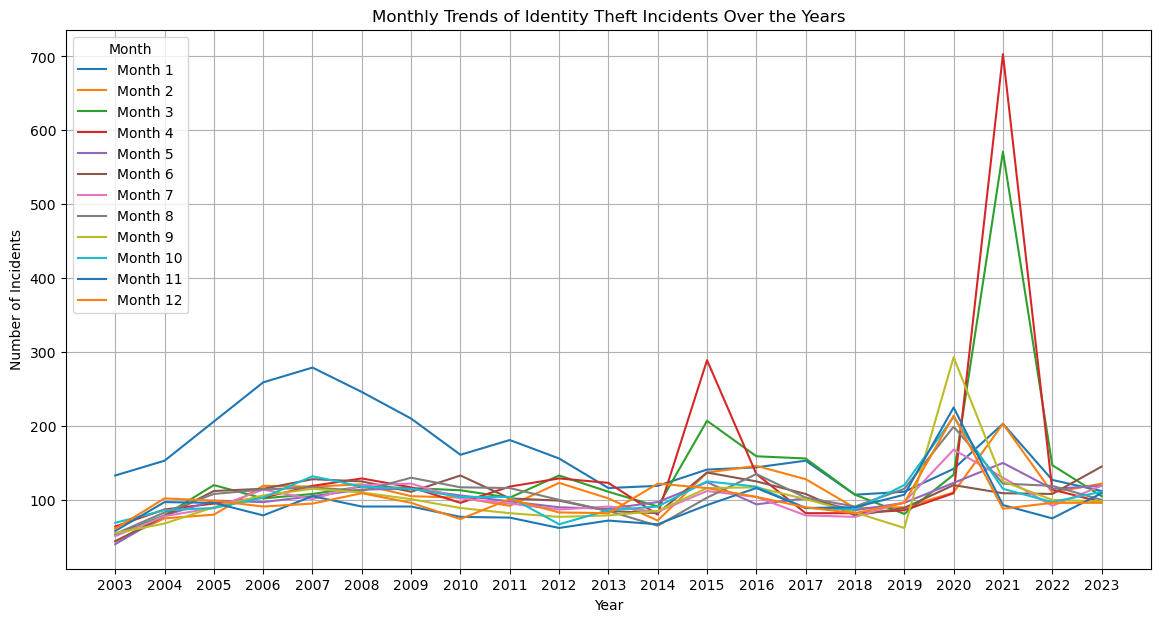

In [23]:
# Plot the trends
plt.figure(figsize=(14, 7))
for column in monthly_trends.columns:
    plt.plot(monthly_trends.index, monthly_trends[column], label=f'Month {column}')
    
plt.title('Monthly Trends of Identity Theft Incidents Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Month')
plt.grid(True)

# Set x-axis labels
plt.xticks(monthly_trends.index)

plt.show()